In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np
from random import randint

In [25]:
def create_points(number,inf=0,sup=50):
    return [[randint(inf,sup),randint(inf,sup)] for i in range(number)]



def hull_plot(pts, convex_hull = None):
    xs,ys = zip(*pts)
    plt.scatter(xs,ys)
    if convex_hull !=None:
        for i in range(1,len(convex_hull)+1):
            if i == len(convex_hull):
                i=0
            c0 = convex_hull[i-1]
            c1 = convex_hull[i]
            plt.plot((c0[0],c1[0]),(c0[1],c1[1]),'r')
    plt.show()

def mcross(p1,p2,p3):
    vx= p1[0] - p2[0] 
    vy = p1[1] - p2[1]
    ux = p2[0] - p3[0]
    uy = p2[1] - p3[1]
    
    vec = vx*uy - vy*ux
    
    #print("cross ", vec )
    return vec

def aresta_draw(points,arestas):
    xs,ys= zip(*points)
    plt.scatter(xs,ys)
    for i in arestas:
        plt.plot((i[0][0],i[1][0]),(i[0][1],i[1][1]))
    plt.show()
        
def inicial_aux(p1,p2,p3):
    m = (p2[1]-p1[1])/(p2[0] - p1[0])
    c= -m*p1[0] + p1[1]

    if p3[1] > m*p3[0] + c:
        return 1
    if p3[1] < m*p3[0] + c:
        return -1    

In [26]:
def  incremental(points):
    edges = []
    sort = sorted(points,key = lambda x : x[0])
    if sort[0][0] == sort[1][0] and sort[1][1]< sort[0][1]:
        sort[0], sort[1] = sort[1], sort[0]
    p1 = sort[0]
    p2 = sort[1]
    p3 = sort[2]
    if inicial_aux(p1,p2,p3) == 1:
        edges.append((sort[0],sort[2]))
        edges.append((sort[2],sort[1]))
        edges.append((sort[1],sort[0]))
    else:
        edges.append((sort[0],sort[1]))
        edges.append((sort[1],sort[2]))
        edges.append((sort[2],sort[0]))
        
    
    aresta_draw(sort,edges)
    #print(edges)
    return incremental2(sort,edges)

In [30]:
def incremental2(points,edges):
    triang = []
    triang.append(edges)
    for i in points[3::]:
        for j in edges[:]:
            p1 = j[0]
            p2 = j[1]
            if  mcross(p1,p2,i) >= 0:
                #print(j)
                del edges[edges.index(j)]
                edges.append((p1,i))
                edges.append((i,p2))
                triang.append((p1,i))
                triang.append((i,p2))
                for k in edges:
                    for w in edges:
                        if (k[0],k[1]) == (w[1],w[0]):
                            del edges[edges.index(k)]
                            del edges[edges.index(w)]
                aresta_draw(points,edges)
                #aresta_draw(points,triang)
                
                  
    return edges,triang
                

In [27]:
points = create_points(10)


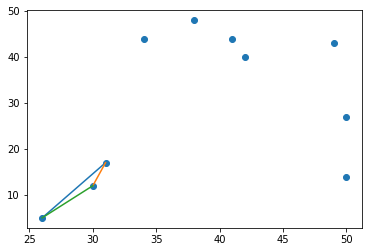

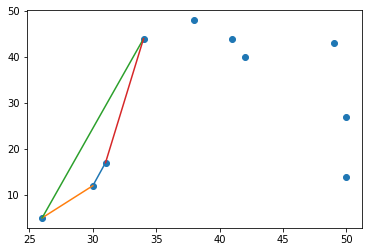

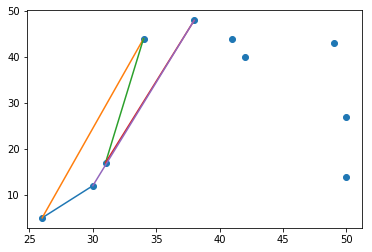

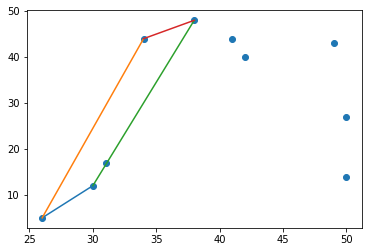

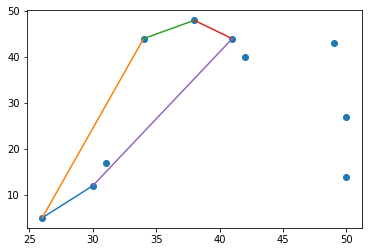

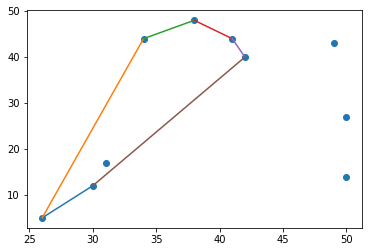

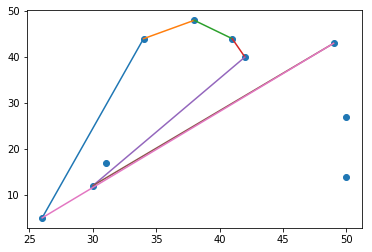

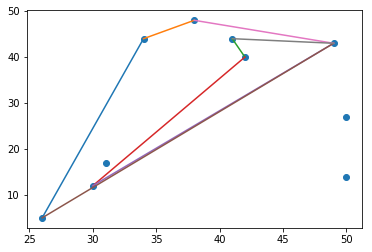

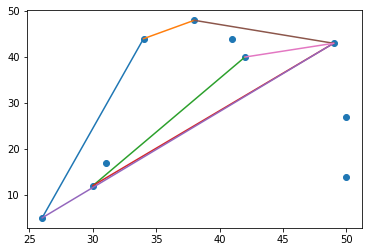

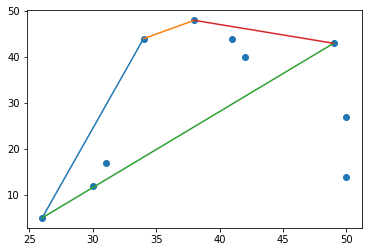

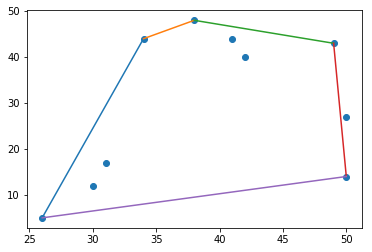

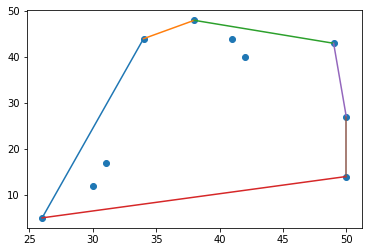

In [31]:
aresta,triang = incremental(points)

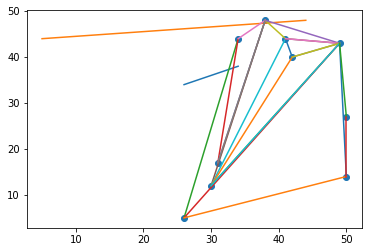

In [35]:
aresta_draw(points,triang)